## General info

Time: 08:30-12:30

Rooms: ES61, ES62, ES63, MT10

Teacher: Magnus Ekh, visits 08:30, 10:15, 11:30.

Aids: python help file "python_help.ipynb"

Comment your code in your files (.ipynb or .py) to explain your solutions/answers. Save these codes/files under c:\__exam__\Assignments\

If you want, handwritten answers can also be handed in.



## Grading

max point= 28p 

grade 5: 23-28p (80-100%)

grade 4: 17-22p (60-80%)

grade 3: 11-16 (40-60%)




In [1]:
#useful packages
import numpy as np
from numpy import linalg as LA
import math as mt
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
from matplotlib import rcParams # for changing default values
import scipy.io as sio
import scipy.optimize
from scipy.optimize import minimize
import timeit
import torch
from torch.autograd import grad
import torch.nn as nn
import torch.optim as optim
import random
from scipy.integrate import odeint

## 1. (4p)

Formulate how a matrix $X$ can be decomposed (using  the Singular Value Decomposition (SVD)) into SVD matrices. Discuss the characteristics of the resulting SVD matrices. Additionally, describe how the full SVD can be reduced to the economy version and explain the advantages of employing the economy SVD.


## 2 (4p)
Use Principal Component Analysis (PCA) on data stored in a matrix $X$. The rows of $X$ represent measurement data of temperatures along a coordinate $x$. Each row is data from a measurement (=snapshot). By projecting the data on the two first principal component directions, distinguish which of the snapshots that are outliers. 

The data is found in the problem2_251030.mat file. It contains 50 samples with 200 temperatures in each sample. 


In [2]:
#Load data from .mat file, example
mat_file=sio.loadmat('problem2_251030.mat')
X=mat_file['X'] # Experimental data


## 3 (4p)
For the NN in the figure:

<img src="nn_251030.png" alt="Neural Network" width="900" style="background:#fff; padding:6px;"/>



a) Assume the following numerical values of weights and biases:

$w^{(1)}$:

In [130]:
w1=np.array([[0.15,0.2,-0.4],[0.1,0.45,0.3],[0.17,-0.27,0.]])

$b^{(1)}$:


In [131]:
b1=np.array([0.12,0.05,-0.2])

$w^{(2)}:$


In [132]:
w2=np.array([[0.15,0.2,-0.4],[0.1,0.45,0.3]])

$b^{(2)}$:

In [133]:
b2=np.array([0.33,0.23])


Assume that the activation functions are all tanh. Compute the outputs for $x=[0.2,-0.4,0.65]$



b) The determine the gradients of $\hat{y}_1$ and  $\hat{y}_2$ w.r.t. the parameters of the NN for for $x=[0.2,-0.4,0.65]$. 

## 4 (5p)

Data from the logarithm of  flow rate–pressure drop vs logarithm of flow rate is given in the $X$ which can be downloaded from the file problem4_251030.mat. The first column in X is the logarithm of flow rate whereas the second column is the flow rate–pressure drop.


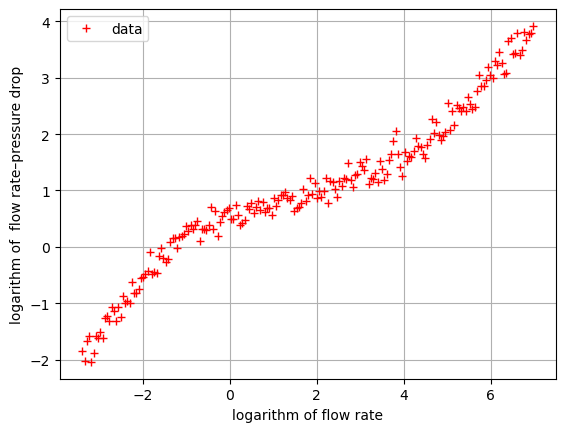

In [3]:
mat_file=sio.loadmat('problem4_251030.mat')
X=mat_file['X']
plt.plot(X[:,0],X[:,1],'r+',label='data')
plt.ylabel('logarithm of  flow rate–pressure drop')
plt.xlabel('logarithm of flow rate')
plt.grid(visible=True)
plt.legend()
plt.show()


a) Use the full data to train a neural network. Assume a feed-forward neural network with one input, three hidden layers with 4 neurons in each layer and one output. Assume the tanh activation function in the hidden layers (but no activation function in the output layer). Choose the Adam optimizer with maximum number of epochs 5000 and the LASSO regularization with the parameter 0.01. 

b) Apply the k-fold cross-validation technique. Use the function train_test_and_k_splits in the help file. Leave 10% of the data for test and 10% of the remaining data for validation. Choose 4 random validation splits. Compute the L2 error against the test dat for the split that has lowest L2 error against validation data. (Otherwise assume the same algorithm and parameters as in a).

## 5 (3p)
For the data X in problem 2 (problem2_251030.mat) where two classes of results were detected. Train a neural network and see if you can identify the correct class for all (50) the temperature field results.

 ## 6 (3p)

 Describe in words the ideas behind Physics Informed Neural Networks. In particular answer

 - how is the cost function typically decomposed?
 - in what part of the cost function is the physics included?
 - what problem areas can PINNs be used for?
 - what are the pros and cons?

## 7 (5p)
Assume a dynamical system can be written as:
$$
\dot{y}=( \dot{x}_1, \, \dot{x}_2, \,\dot{x}_3, \, \ddot{x}_1, \, \ddot{x}_2, \,\ddot{x}_3)^T=
(y_4, \, y_5, \, y_6, \, f(y, \dot{y})/m_1, \, g(y, \dot{y})/m_2, \, h(y, \dot{y})/m_3)^T+
(0, \, 0, \, 0, \, 0, \, F(t)/m_2, \, 0 )^T
$$
where $m_1=m_2=m_3=1$ kg and $F(t)$ defined by

In [105]:
def F(t):
    return 100.*np.sin( t*2.*np.pi )*np.exp(-t*2.*np.pi)

Use model discovery and SinDy to find the expressions for $f$, $g$ and $h$. Assume up to 2nd degree polynomials in your model library ${\boldsymbol \Theta}$. Experimental values for $y$ and $\dot{y}$ are given in the matrices $\dot{Y}$ and $Y$ (both with dimensions 500 times 6 where 500 refers to the number of timesteps). Import these by:


In [4]:
mat_file=sio.loadmat('problem7_251030.mat')
Y=mat_file['Y']
Ydot=mat_file['Ydot']


The time is given by

In [ ]:
t = np.linspace(0, 40, 500)